Hand-In of Group 13, Jonathan Ehrengruber (jonathan.ehrengruber@students.fhnw.ch), Christian Renold (christian.renold@hslu.ch)

# Exercise 1 Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### a) Load first dataset  - Scores

In [2]:
## Note: Adjust data path if needed
datapath = '../data/ex1-system-a.csv'
datasetA = pd.read_csv(datapath,names=['0','1','2','3','4','5','6','7','8','9','y_true','unused'], sep = ";")
datasetA = datasetA.drop('unused', axis = 1) # drop the last colomn without any information in it.
classes_name = ['0','1','2','3','4','5','6','7','8','9']
nb_classes = 10
datasetA.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,5.348450e-08,7.493480e-10,8.083470e-07,2.082290e-05,5.222360e-10,2.330260e-08,5.241270e-12,9.999650e-01,4.808590e-07,0.000013,7
1,1.334270e-03,3.202960e-05,8.504280e-01,1.669090e-03,1.546460e-07,2.412940e-04,1.448280e-01,1.122810e-11,1.456330e-03,0.000011,2
2,3.643050e-06,9.962760e-01,2.045910e-03,4.210530e-04,2.194020e-05,1.644130e-05,2.838160e-04,3.722960e-04,5.150120e-04,0.000044,1
3,9.998200e-01,2.550390e-10,1.112010e-05,1.653200e-05,5.375730e-10,8.999750e-05,9.380920e-06,4.464470e-05,2.418440e-06,0.000006,0
4,2.092460e-08,7.464220e-08,3.560820e-05,5.496200e-07,9.988960e-01,3.070920e-08,2.346150e-04,9.748010e-07,1.071610e-06,0.000831,4


In [3]:
y_true = datasetA['y_true'].values
y_scores_A = datasetA[classes_name].values   #isolate the matrix of scores
y_pred_A = np.argmax(y_scores_A,axis=1)      #elect winner class

### b) What is the overall error rate of the system ?

In [4]:
### START YOUR CODE
overall_rate = 1 - (y_true == y_pred_A).sum() / y_true.shape[0]
### END YOUR CODE

print('overall error rate of the system : ',overall_rate)

overall error rate of the system :  0.10729999999999995


### c) Compute and report the confusion matrix of the system.

We create a second one our selfs and ckeck if it is correct with the "correct" one from sklearn.

In [5]:
def confusion_matrix2(y_true,y_pred,nb_classes):
    """
    Arguments:
    y_true -- groud truth labels
    y_pred -- predicted values
    n_classes -- number of classes
    
    Returns:
    the confusion matrix as 2d numpy array 
    """
    ### START YOUR CODE
    counts = np.zeros((nb_classes, nb_classes))
    for i in range(nb_classes):
        y_maybe = np.argwhere(y_pred_A == i)
        for j in range(nb_classes):
            counts[j, i] = (y_true[y_maybe] == j).sum()
    ### END YOUR CODE
    return counts

In [6]:
# TEST - we use the sklearn builit in functionality
from sklearn.metrics import confusion_matrix
verif_cm = confusion_matrix(y_true,y_pred_A)

cm_A = confusion_matrix2(y_true, y_pred_A,nb_classes)
# verification for our confusion matrix function
print((cm_A == verif_cm).sum() == nb_classes**2)

True


Now we want to plot the confusion matrix.

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

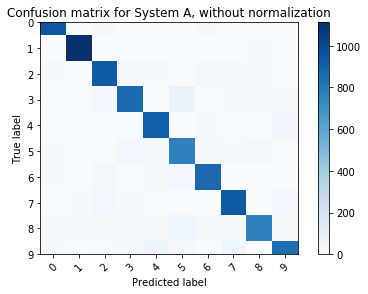

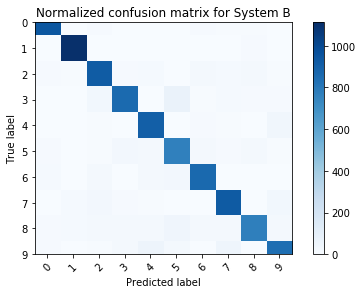

In [8]:
plt.figure()
plot_confusion_matrix(cm_A, classes=classes_name,title='Confusion matrix for System A, without normalization')

plt.figure()
plot_confusion_matrix(cm_A, classes=classes_name, normalize=True,
                      title='Normalized confusion matrix for System B')

plt.show()

### d) What are the worst and best classes in terms of precision and sensitivity (recall) ?

In [9]:
def precision_per_class(cm):
    """
    Aguments:
    cm -- confusion matrix
    Returns:
    Precision per class, i.e. a numpy array of length given by the number of classes
    """
    ### START YOUR CODE  
    return np.diag(cm) / cm.sum(axis=0)
    ### END YOUR CODE

In [10]:
def recall_per_class(cm):
    """
    Aguments:
    cm -- confusion matrix
    Returns:
    Recall per class, i.e. a numpy array of length given by the number of classes
    """
    ### START YOUR CODE  
    return np.diag(cm) / cm.sum(axis=1)
    ### END YOUR CODE

In [11]:
def accuracy_per_class(cm):
    """
    Aguments:
    cm -- confusion matrix
    Returns:
    Recall per class, i.e. a numpy array of length given by the number of classes
    """
    ### START YOUR CODE
    diags = np.diag(cm)
    n_classes = cm.shape[0]
    tns = np.zeros(n_classes)
    for i in range(n_classes):
        mask = np.zeros(shape=(n_classes, n_classes))
        mask[:, i] = 1
        mask[1, i] = 1
        tns[i] = np.ma.array(cm, mask=mask).sum()
    return (tns + diags) / cm.sum()
    ### END YOUR CODE

In [12]:
accuracy_per_class(cm_A)

array([0.9939, 0.995 , 0.9869, 0.9895, 0.9857, 0.9824, 0.9909, 0.9881,
       0.9913, 0.989 ])

In [13]:
precisions = precision_per_class(cm_A)
# should return '1' as best (95.7%)
# and '5' as worst (81.4%) 
print(precisions)
best_class = np.argmax(precisions)
worst_class = np.argmin(precisions)
print('best precision class  : ', best_class, '[', precisions[best_class],']')
print('worst precision class : ', worst_class, '[', precisions[worst_class],']')

[0.93930348 0.95697074 0.87547529 0.89141675 0.86419753 0.81355932
 0.90481172 0.88645038 0.89871944 0.88469602]
best precision class  :  1 [ 0.9569707401032702 ]
worst precision class :  5 [ 0.8135593220338984 ]


In [14]:
recalls = recall_per_class(cm_A)
# should return '1' as best (97.97%)
# and '8' as worst (79.26%) 

best_class = np.argmax(recalls)
worst_class = np.argmin(recalls)
print('best recall class  : ', best_class, '[',recalls[best_class],']')
print('worst recall class : ', worst_class, '[',recalls[worst_class],']')

best recall class  :  1 [ 0.9797356828193833 ]
worst recall class :  8 [ 0.7926078028747433 ]


### e) Load second dataset  - Scores

Find the output of a second system B. It contains the same ground truth values - but different predictions.
What is the best system between (a) and (b) in terms of error rate and F1.

In [15]:
datapath = '../data/ex1-system-b.csv'
datasetB = pd.read_csv(datapath,names=['0','1','2','3','4','5','6','7','8','9','y_true','unused'], sep = ";")
datasetB = datasetB.drop('unused', axis = 1) # drop the last colomn without any information in it.
datasetB.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,1.675320e-11,2.584750e-11,1.796600e-07,1.229790e-05,6.932370e-16,2.499490e-11,3.506180e-16,9.999870e-01,9.081160e-11,1.482410e-09,7
1,2.348330e-08,1.081260e-06,9.999700e-01,2.765590e-05,3.209940e-12,4.008910e-09,1.594070e-06,3.191980e-12,1.573330e-07,9.856860e-12,2
2,5.653110e-09,9.997150e-01,2.231520e-04,6.524200e-06,4.818190e-07,1.273150e-07,2.173000e-06,1.416840e-05,3.833510e-05,6.327910e-08,1
3,9.999860e-01,1.825320e-10,9.027630e-06,8.147850e-09,7.237800e-12,3.341060e-09,1.152500e-06,3.915740e-06,7.381230e-11,4.782200e-08,0
4,1.349270e-08,2.039600e-10,3.194220e-07,1.773480e-10,9.996150e-01,1.231720e-08,2.821290e-07,2.402690e-06,1.690530e-08,3.820520e-04,4


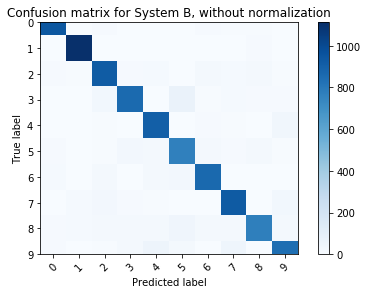

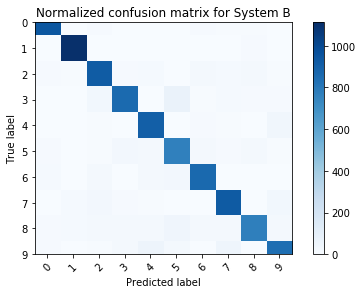

In [16]:
y_true = datasetB['y_true'].values
y_scores_B = datasetB[classes_name].values   #isolate the matrix of scores
y_pred_B = np.argmax(y_scores_B,axis=1)      #elect winner class

cm_B = confusion_matrix2(y_true,y_pred_B,nb_classes)

plt.figure()
plot_confusion_matrix(cm_B, classes=classes_name,title='Confusion matrix for System B, without normalization')

plt.figure()
plot_confusion_matrix(cm_B, classes=classes_name, normalize=True,
                      title='Normalized confusion matrix for System B')

plt.show()

In [17]:
def system_precision(cm):
    ### START YOUR CODE
    return precision_per_class(cm).mean(axis=0)
    ### END YOUR CODE

def system_recall(cm):
    ### START YOUR CODE
    return recall_per_class(cm).mean(axis=0)
    ### END YOUR CODE
    
def system_accuracy(cm, per_class_avg=False):
    ### START YOUR CODE
    if not per_class_avg:
        class_acc = np.diag(cm) / cm.sum()
        return class_acc.mean(axis=0)
        
    else:
        return accuracy_per_class.mean(axis=0)
    ### END YOUR CODE
    
def system_f1_score(cm):
    ### START YOUR CODE
    sys_prec = system_precision(cm)
    sys_rec = system_recall(cm)
    return 1/ (0.5 * ((1/sys_prec) + (1/sys_rec)))
    ### END YOUR CODE

In [18]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [19]:
system_precision(cm_A)

0.8915600668746141

In [20]:
precision_score(y_true, y_pred_A, average=None).mean()

0.8915600668746141

In [21]:
system_recall(cm_A)

0.8912273798308427

In [22]:
recall_score(y_true, y_pred_A, average=None).mean()

0.8912273798308427

In [23]:
print('System A\n\trecall : ',system_recall(cm_A),'\n\tprecision : ',system_precision(cm_A),'\n\taccuracy : ',system_accuracy(cm_A),'\n\tf1-score : ',system_f1_score(cm_A))
print('System B\n\trecall : ',system_recall(cm_B),'\n\tprecision : ',system_precision(cm_B),'\n\taccuracy : ',system_accuracy(cm_B),'\n\tf1-score : ',system_f1_score(cm_B))

System A
	recall :  0.8912273798308427 
	precision :  0.8915600668746141 
	accuracy :  0.08927000000000002 
	f1-score :  0.891393692311263
System B
	recall :  0.8912273798308427 
	precision :  0.8915600668746141 
	accuracy :  0.08927000000000002 
	f1-score :  0.891393692311263


Optional: check with the recall_score and precision_score function of SciKit Learn ```from sklearn.metrics import recall_score, precision_score``` that you obtain correct recall and precision values (use the argument ```average="macro"```).